In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [47]:
def sigmoid_up(x: np.array, k: float, c: float, shift: float, h: float):
    return k * x + h/(1 + np.exp(-c * (x - shift)))

def sigmoid_bottom(x: np.array, k: float, c: float, shift: float, h: float):
    return k * x + h/(1 + np.exp(-c * (x - shift))) - h

In [48]:
def hyst_sigm(points: int, k: float, c: float, shift: float, hight: float, width: float, branch: str):
    x = np.linspace(-3, 3, points)
    if branch == 'up':
        P_plus = np.array([k * x[i] + hight/(1 + np.exp(-c * (x[i] - shift)))  for i in range(points) if x[i] > 0])
        P_minus = np.array([k * x[i] + hight/(1 + np.exp(-c * (x[i] + shift + width))) - hight for i in range(points) if x[i] < 0])
        P_up = np.concatenate((P_minus, P_plus))
        return [x, P_up]
    elif branch == 'bottom':
        P_plus = np.array([k * x[i] + hight/(1 + np.exp(-c * (x[i] - shift - width)))  for i in range(points) if x[i] > 0])
        P_minus = np.array([k * x[i] + hight/(1 + np.exp(-c * (x[i] + shift))) - hight for i in range(points) if x[i] < 0])
        P_bottom = np.concatenate((P_minus, P_plus))
        return [x, P_bottom]


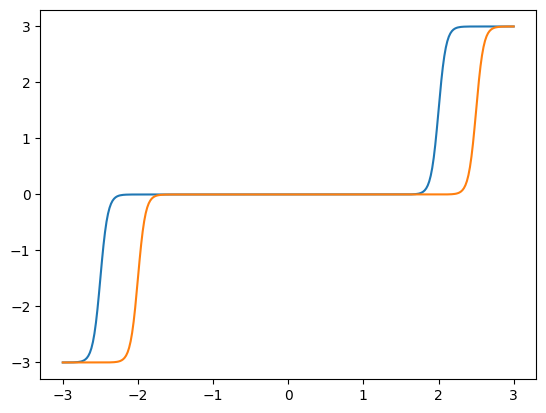

In [54]:
n = 300
V_up, P_up = hyst_sigm(n, 0, 20, 2, 3, 0.5, 'up')
V_bottom, P_bottom = hyst_sigm(n, 0, 20, 2, 3, 0.5, 'bottom')

plt.plot(V_up, P_up)
plt.plot(V_bottom, P_bottom)

(-3.0, 3.0)

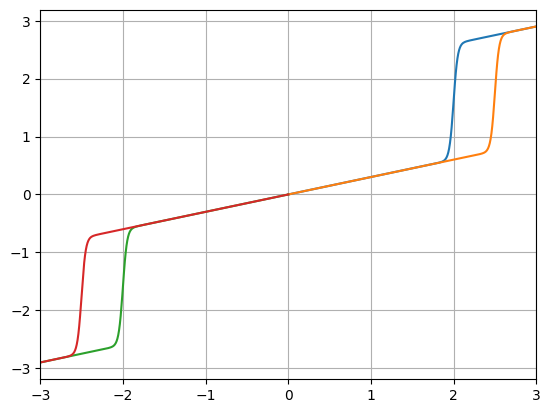

In [50]:
x_up = np.linspace(0, 3, 300)
x_bottom = np.linspace(-3, 0, 300)
plt.plot(x_up, sigmoid_up(x_up, 0.3, 40, 2, 2))
plt.plot(x_up, sigmoid_up(x_up, 0.3, 40, 2.5, 2))
plt.plot(x_bottom, sigmoid_bottom(x_bottom, 0.3, 40, -2, 2))
plt.plot(x_bottom, sigmoid_bottom(x_bottom, 0.3, 40, -2.5, 2))
plt.grid()
plt.xlim([-3,3])